# OpenCV- Getting Started



---

# Import OpenCV-Python and other packages

In [1]:
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt

print("OpenCV-Python Version %s" % cv2.__version__)

OpenCV-Python Version 4.5.1


# Open/display an image

In [4]:
img = cv2.imread('images/messi.jpg', cv2.IMREAD_COLOR)
img

array([[[ 39,  43,  44],
        [ 42,  46,  47],
        [ 44,  47,  52],
        ...,
        [ 57,  55,  55],
        [ 55,  53,  53],
        [ 52,  50,  50]],

       [[ 37,  40,  44],
        [ 42,  45,  49],
        [ 46,  49,  54],
        ...,
        [ 62,  60,  60],
        [ 60,  58,  58],
        [ 57,  55,  55]],

       [[ 41,  45,  50],
        [ 46,  50,  55],
        [ 51,  55,  60],
        ...,
        [ 64,  63,  65],
        [ 63,  62,  64],
        [ 60,  59,  61]],

       ...,

       [[ 56, 143,  99],
        [ 48, 133,  89],
        [ 49, 129,  86],
        ...,
        [ 60, 134,  92],
        [ 63, 134,  94],
        [ 73, 145, 103]],

       [[ 54, 138,  96],
        [ 59, 141,  99],
        [ 50, 130,  87],
        ...,
        [ 56, 132,  91],
        [ 69, 142, 104],
        [ 64, 137,  97]],

       [[ 45, 129,  87],
        [ 58, 140,  98],
        [ 71, 151, 108],
        ...,
        [ 49, 124,  86],
        [ 52, 125,  87],
        [ 51, 124,  86]]

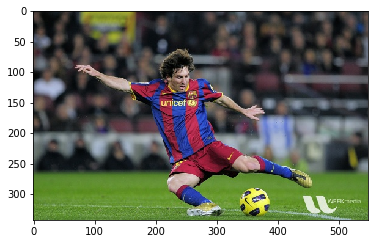

In [5]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Basic operations on Images

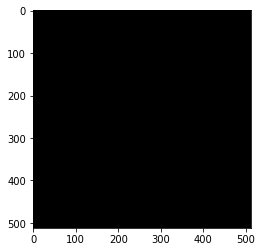

In [6]:
# Create a black image
img2 = np.zeros((512,512,3), np.uint8)
plt.imshow(img2)

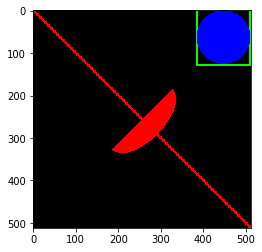

In [7]:
# Draw a line using cv2.line(image, startPoint, endPoint, rgb, thinkness)
cv2.line(img2, (0,0), (511,511), (255,0,0), 5)
# => Diagonal red line with thickness of 5 px

# Draw a rectangle using cv2.rectangle(image, topLeft, bottomRight, rgb, thinkness)
cv2.rectangle(img2, (384,0), (510,128), (0,255,0), 3)
# => Green rectangle with thickness of 3 px

# Draw a circle using cv2.circle(image, center, radius, rgb, thinkness)
cv2.circle(img2, (447,63), 63, (0,0,255), -1)
# => Blue filled circle(note that the thinkness is -1)

# Draw a ellipse using cv2.ellipse(image, center, axes, angle, startAngle, endAngle, rgb, thinkness)
cv2.ellipse(img2, (256,256), (100,50), -45, 0, 180, (255,0,0), -1)
# => Red wide down-half ellipse

plt.imshow(img2)

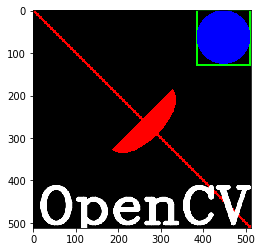

In [8]:
# Put some text using cv2.putText(image, text, bottomLeft, fontType, fontScale, rgb, thinkness, lineType)
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img2, 'OpenCV', (10,500), font, 4, (255,255,255), 10, cv2.LINE_AA)
# => White 'OpenCV' text at the bottom

plt.imshow(img2)

---

## Edge detection with sobel operator

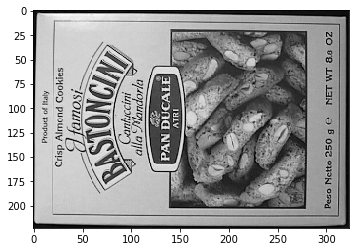

In [9]:
input_image = cv2.imread('images/box.png', cv2.IMREAD_GRAYSCALE)  # input_image: 2-dim array
plt.imshow(input_image, cmap='gray') 

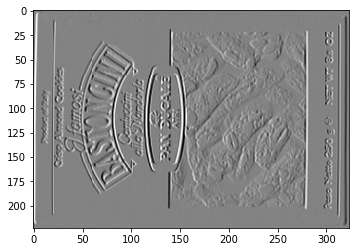

In [10]:
ddepth = cv2.CV_64F  # 64-bit float output
dx = 1  # First-order derivative in x-direction
dy = 0  # NO derivative in y-direction
sobelx = cv2.Sobel(input_image, ddepth, dx, dy)

plt.imshow(sobelx, cmap='gray')

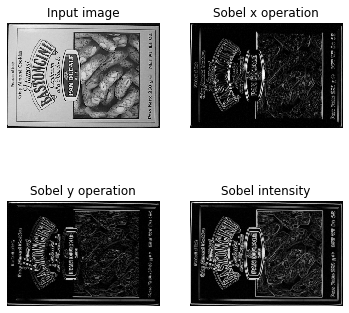

In [11]:
sobelx = cv2.Sobel(input_image, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(input_image, cv2.CV_64F, 0, 1)
sobel = cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx, 2.0), 1.0, cv2.pow(sobely, 2.0), 1.0, 0.0))

plt.figure(figsize=(6, 6));
plt.subplot(2, 2, 1); plt.title('Input image'); plt.axis('off');
plt.imshow(input_image, cmap='gray');
plt.subplot(2, 2, 2); plt.title('Sobel x operation'); plt.axis('off');
plt.imshow(cv2.absdiff(sobelx, 0.0), cmap='gray')
plt.subplot(2, 2, 3); plt.title('Sobel y operation'); plt.axis('off');
plt.imshow(cv2.absdiff(sobely, 0.0), cmap='gray');
plt.subplot(2, 2, 4); plt.title('Sobel intensity'); plt.axis('off');
plt.imshow(sobel, cmap='gray');

---

## Canny Edge Detection

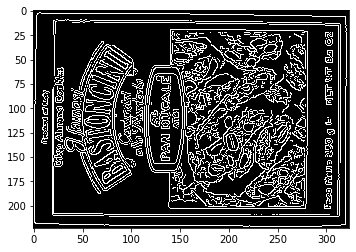

In [13]:
threshold1 = 100
threshold2 = 200
canny = cv2.Canny(input_image, threshold1, threshold2)

plt.imshow(canny, cmap='gray')

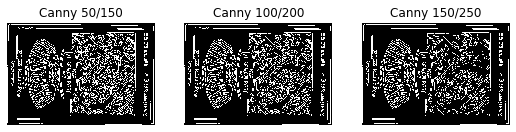

In [14]:
# Edge detections with the various thresholds
canny1 = cv2.Canny(input_image, 50, 150)
canny2 = cv2.Canny(input_image, 100, 200)
canny3 = cv2.Canny(input_image, 150, 250)

plt.figure(figsize=(9, 3));
plt.subplot(1, 3, 1); plt.title('Canny 50/150'); plt.axis('off');
plt.imshow(canny1, cmap='gray');
plt.subplot(1, 3, 2); plt.title('Canny 100/200'); plt.axis('off');
plt.imshow(canny2, cmap='gray');
plt.subplot(1, 3, 3); plt.title('Canny 150/250'); plt.axis('off');
plt.imshow(canny3, cmap='gray');